<a href="https://colab.research.google.com/github/Park-New-project/TIL/blob/main/%5BAI%5D_221027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==2.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras==2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv("/content/gdrive/MyDrive/Colab/data/pima-indians-diabetes.csv", names=['pregnant','plasma','pressure','thickness','insulin','BMI','pedigree','age','diabetes'])
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe() # 각 컬럼별 요약 통계 정보

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['pregnant']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: pregnant, Length: 768, dtype: int64

In [ ]:
df[['pregnant', 'diabetes']]

,pregnant,diabetes
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [ ]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
df['pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64

In [ ]:
df[['pregnant','diabetes']]

,pregnant,diabetes
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [ ]:
df[['pregnant','diabetes']].groupby(['pregnant']).mean()

,diabetes
pregnant,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


In [ ]:
df[['pregnant','diabetes']].groupby(['pregnant'], as_index=False).mean()

,pregnant,diabetes
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [ ]:
df[['pregnant','diabetes']].groupby(['pregnant'], as_index=False).mean().sort_values(by='diabetes')

,pregnant,diabetes
2,2,0.184466
1,1,0.214815
6,6,0.320000
4,4,0.338235
0,0,0.342342
3,3,0.360000
5,5,0.368421
10,10,0.416667
12,12,0.444444
13,13,0.500000


In [ ]:
df[['pregnant','diabetes']].groupby(['pregnant'], as_index=False).mean().sort_values(ascending=False, by='diabetes')

,pregnant,diabetes
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


In [ ]:
df.corr

<bound method DataFrame.corr of      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     diabetes  
0           1  
1           0  
2      

- df.corr() : 상관도가 +1(정방향) 이거나 -1(역방향)이어도 1에 가까울수록 상관도가 높고 0에 가까울수록 상관도가 낮다.

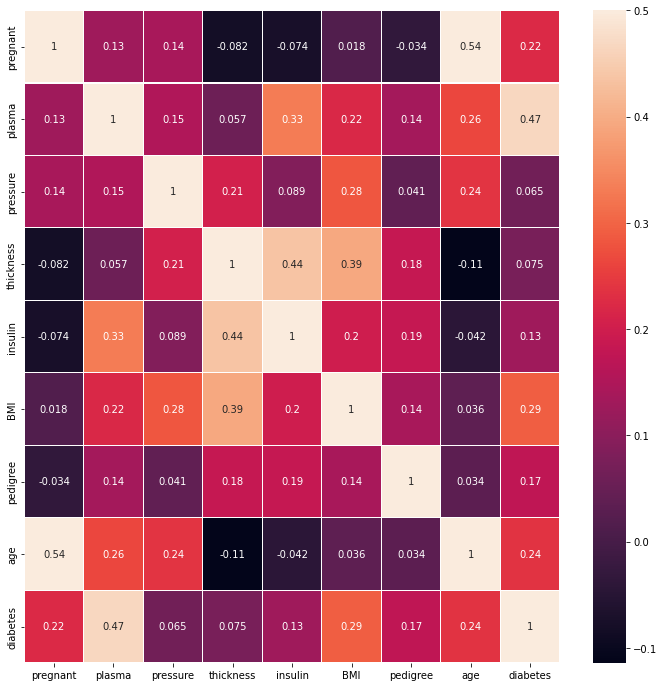

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5,
            linecolor='white', annot=True)
plt.show()

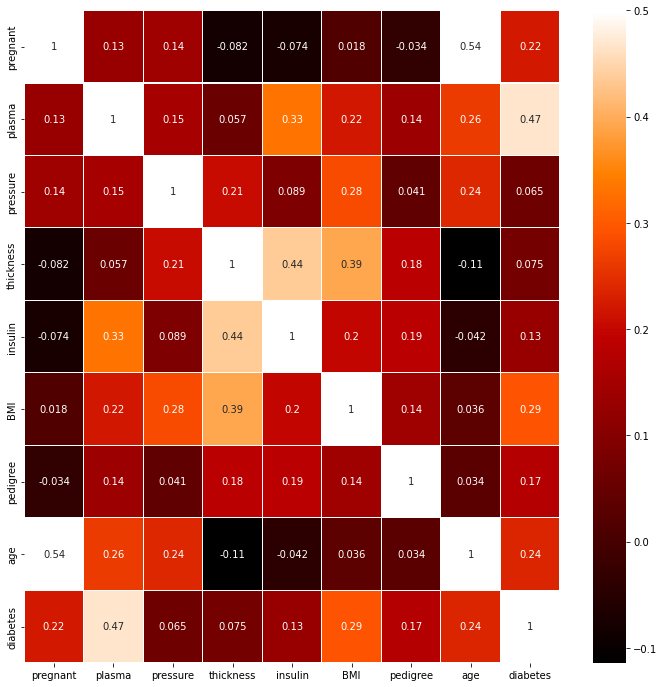

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)
plt.show()

In [ ]:
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.plasma # 인덱스로 접근하는 것과 같은 효과

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plasma, Length: 768, dtype: int64

In [ ]:
# 1. 데이터 준비
x_data = df.iloc[:,0:8]
x_data

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y_data = df.iloc[:,8]
y_data

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [ ]:
# 2. 인공신경망 구조 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name = "Dense_1")) # params -> input(8)*12+bias(12) = 108
model.add(Dense(8,activation='relu', name='Dense_2')) # parmas -> input(12)*8+bias(8) = 104
model.add(Dense(1,activation='sigmoid', name='Dense_3')) # params => input(8)*1+bias(1) =9

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
Dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
Dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 딥러닝 구동할 환경 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 지도학습, 기계학습
model.fit(x_data, y_data, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 3s 5ms/step - loss: 8.5705 - accuracy: 0.6237
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 2.8674 - accuracy: 0.5247
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 1.0744 - accuracy: 0.5182
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.8166 - accuracy: 0.5195
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7609 - accuracy: 0.5872
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7086 - accuracy: 0.6549
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6706
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6576
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6862
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6084 - accura

In [ ]:
model.evaluate(x_data,y_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7669


[0.4691907465457916, 0.7669270634651184]

In [ ]:
print("정확도: %.2f"%(model.evaluate(x_data,y_data)[1]*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7669
정확도: 76.69


In [ ]:
df.diabetes

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [ ]:
x=[df.plasma[df.diabetes==0]]
x

[1       85
 3       89
 5      116
 7      115
 10     110
       ... 
 762     89
 763    101
 764    122
 765    121
 767     93
 Name: plasma, Length: 500, dtype: int64]

In [ ]:
x=[df.plasma[df.diabetes==0],df.plasma[df.diabetes==1]]
x

[1       85
 3       89
 5      116
 7      115
 10     110
       ... 
 762     89
 763    101
 764    122
 765    121
 767     93
 Name: plasma, Length: 500, dtype: int64, 0      148
 2      183
 4      137
 6       78
 8      197
       ... 
 755    128
 757    123
 759    190
 761    170
 766    126
 Name: plasma, Length: 268, dtype: int64]

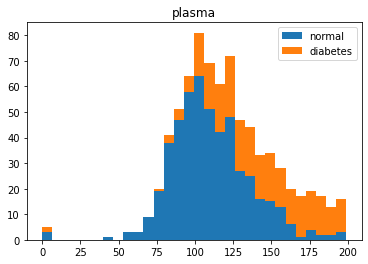

In [ ]:
plt.hist(x,bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.title("plasma")
plt.legend()
plt.show()

In [ ]:
# groupby로 dataframe 생성
df_pregnant = df[['pregnant', 'diabetes']].groupby('pregnant', as_index = False)
df_info = pd.DataFrame()

df_info['pregnant'] = df_pregnant.count()['pregnant']
df_info['count'] = df_pregnant.count()['diabetes']
df_info['sum'] = df_pregnant.sum()['diabetes']
df_info['mean'] = df_pregnant.mean()['diabetes']

df_info

,pregnant,count,sum,mean
0,0,111,38,0.342342
1,1,135,29,0.214815
2,2,103,19,0.184466
3,3,75,27,0.360000
4,4,68,23,0.338235
5,5,57,21,0.368421
6,6,50,16,0.320000
7,7,45,25,0.555556
8,8,38,22,0.578947
9,9,28,18,0.642857
